170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 75ms/step - accuracy: 0.3229 - loss: 1.8245 - val_accuracy: 0.4955 - val_loss: 1.4106
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.5414 - loss: 1.2865 - val_accuracy: 0.5771 - val_loss: 1.1690
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.6109 - loss: 1.0995 - val_accuracy: 0.5941 - val_loss: 1.1304
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.6503 - loss: 0.9944 - val_accuracy: 0.6628 - val_loss: 0.9505
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.6782 - loss: 0.9148 - val_accuracy: 0.6698 - val_loss: 0.9366
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.7079 - loss: 0.8403 - val_accuracy: 0.6872 - val_loss: 0.8904
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.7245 - loss: 0.7949 - val_accuracy: 0.6959 - val_loss: 0.8795
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.7404 - loss: 0.7451 - 

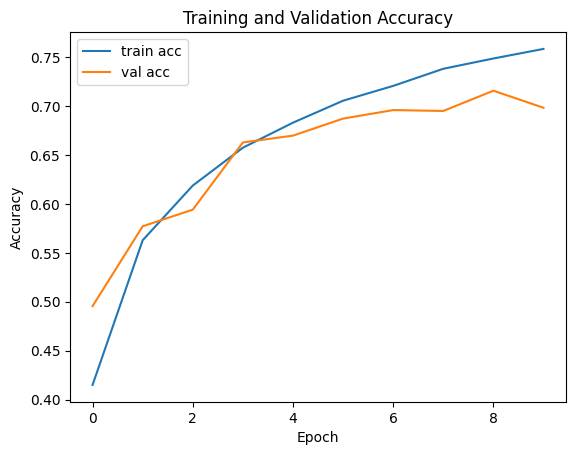

In [1]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
y_train = y_train.flatten()
y_test = y_test.flatten()

# Step 3: Define CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

# Step 7: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
